<div class='alert alert-block alert-info'><h2>Financial Crisis in Africa</h2> </div>

# About Dataset
## Context

This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx

The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

## Content

The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

## Acknowledgements

Reinhart, C., Rogoff, K., Trebesch, C. and Reinhart, V. (2019) Global Crises Data by Country.
[online] https://www.hbs.edu/behavioral-finance-and-financial-stability/data. Available at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx [Accessed: 17 July 2019].

## Inspiration

My inspiration stems from two questions: "Which factors are most associated with Systemic Crises in Africa?" And; "At which annual rate of inflation does an Inflation Crisis become a practical certainty?"

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
                   
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('african_crises.csv')
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [5]:
df.shape

(1059, 14)

In [6]:
df.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

# EDA

In [8]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


### Correlation Matrix

In [10]:
df.select_dtypes(include='number').corr()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


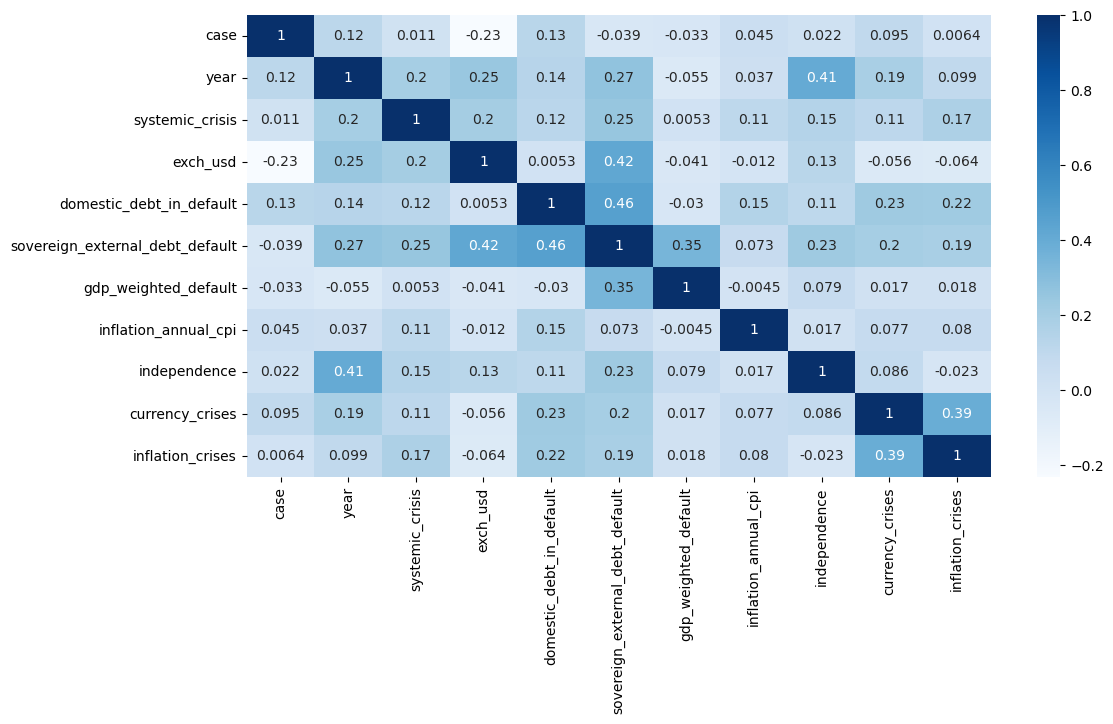

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='Blues')
plt.show()

### Banking crisis distribution

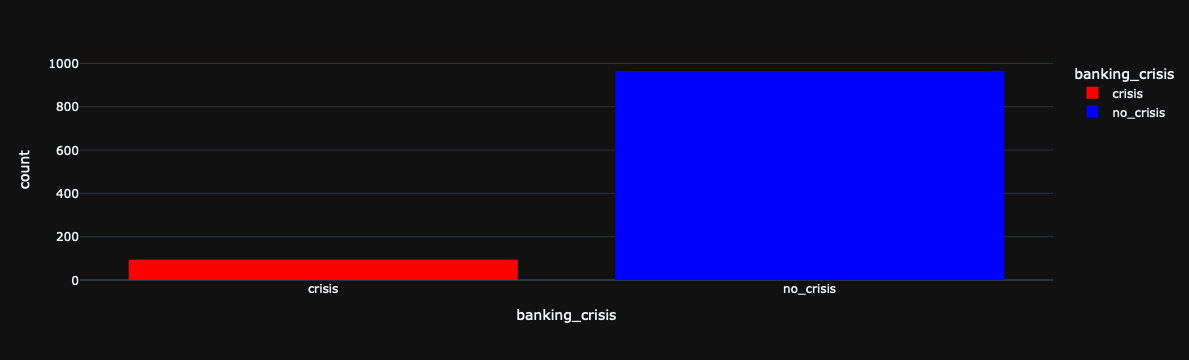

In [13]:
px.histogram(df,x='banking_crisis',color='banking_crisis',color_discrete_map={'crisis':'red','no_crisis':'Blue'},template='plotly_dark')

### Annual inflation rate over years

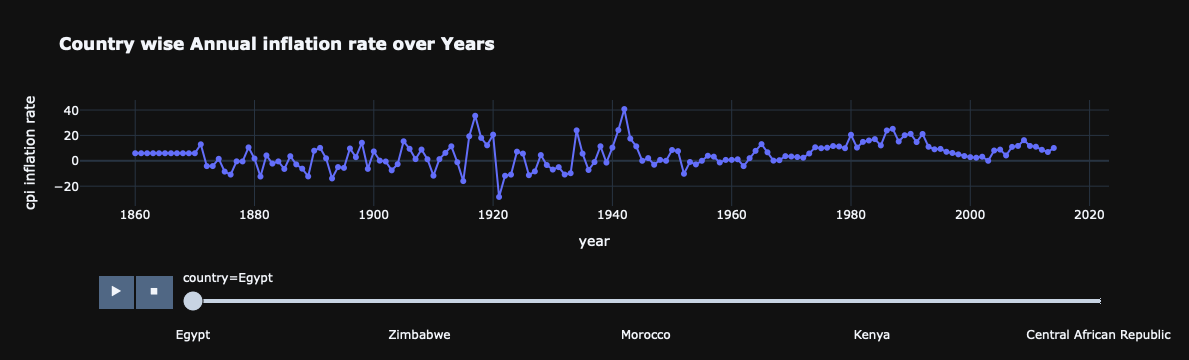

In [15]:
fig=px.line(df.sort_values(by='year'),x='year',y='inflation_annual_cpi',animation_frame='country',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Annual inflation rate over Years')
fig.update_traces(showlegend=False)

### Exchange rate over years

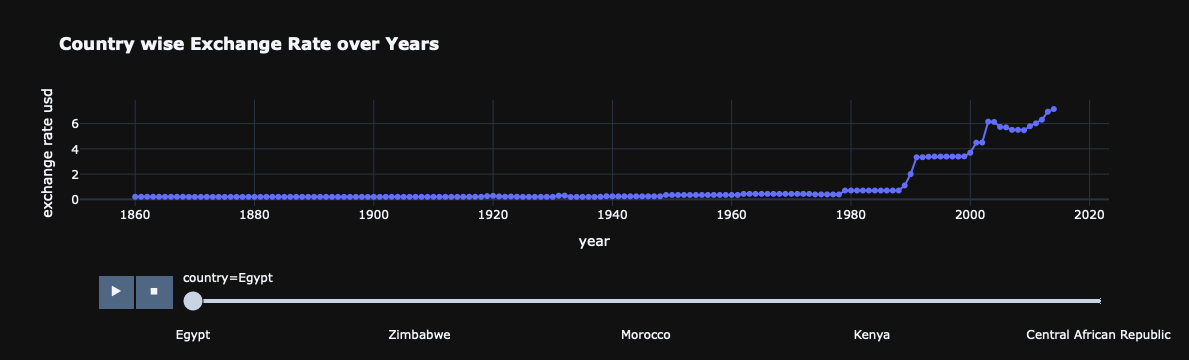

In [17]:
fig=px.line(df.sort_values(by='year'),x='year',y='exch_usd',animation_frame='country',labels={'exch_usd':'exchange rate usd'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Exchange Rate over Years')
fig.update_traces(showlegend=False)

### Inflation rate in every countries

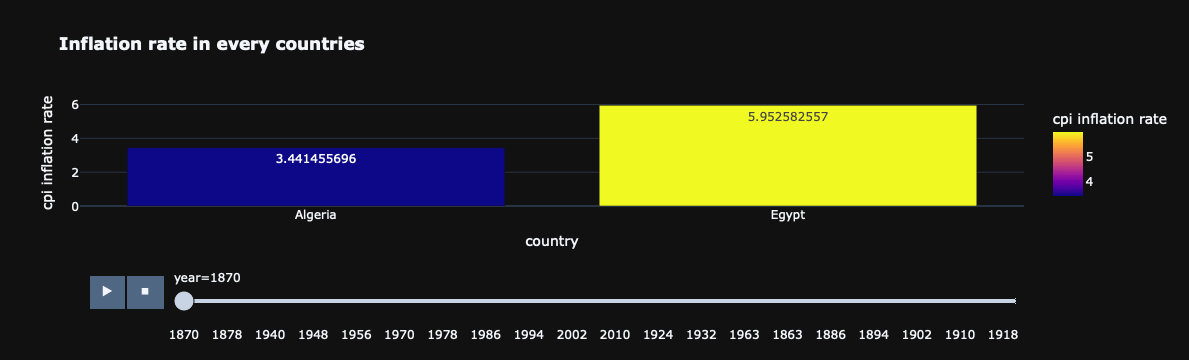

In [19]:
px.bar(df,x='country',y='inflation_annual_cpi',color='inflation_annual_cpi',animation_frame='year',text='inflation_annual_cpi',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='country',template='plotly_dark',title='<b> Inflation rate in every countries')

### Exchange Rate of countries in Africa continent

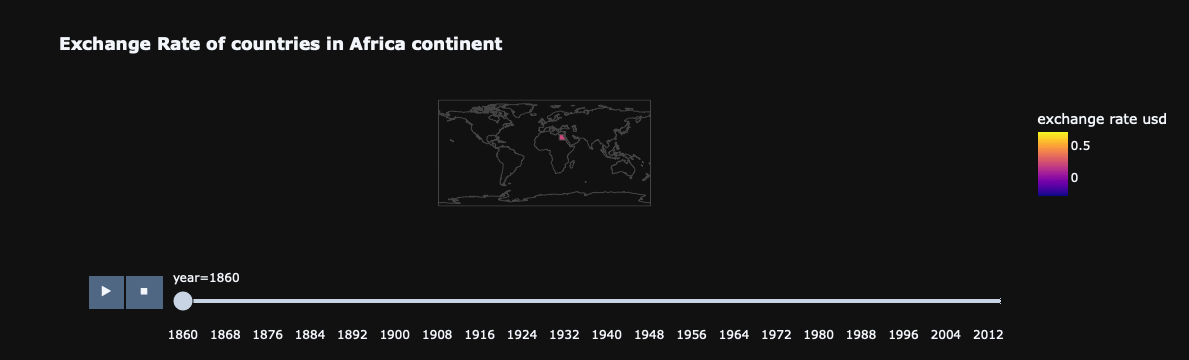

In [21]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'exch_usd':'exchange rate usd','cc3':'code','country':'country'},animation_group='country',color='exch_usd',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Exchange Rate of countries in Africa continent',template='plotly_dark')

### Annual inflation rate of countries in Africa continent

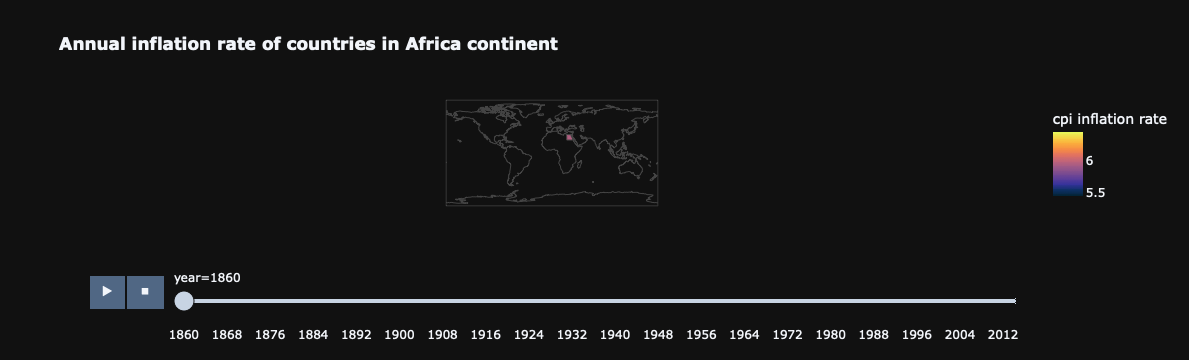

In [23]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_annual_cpi':'cpi inflation rate','cc3':'code','country':'country'},animation_group='country',color='inflation_annual_cpi',color_continuous_scale=px.colors.sequential.thermal,title='<b>Annual inflation rate of countries in Africa continent',template='plotly_dark')

### Currency Crises of countries in Africa continent

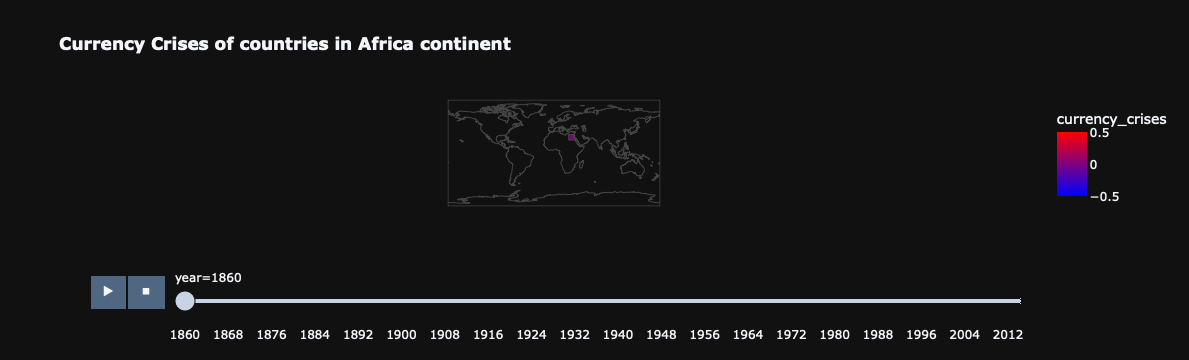

In [25]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'currency_crises':'currency_crises','cc3':'code','country':'country'},animation_group='country',color='currency_crises',title='<b>Currency Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')

### Inflation Crises of countries in Africa continent

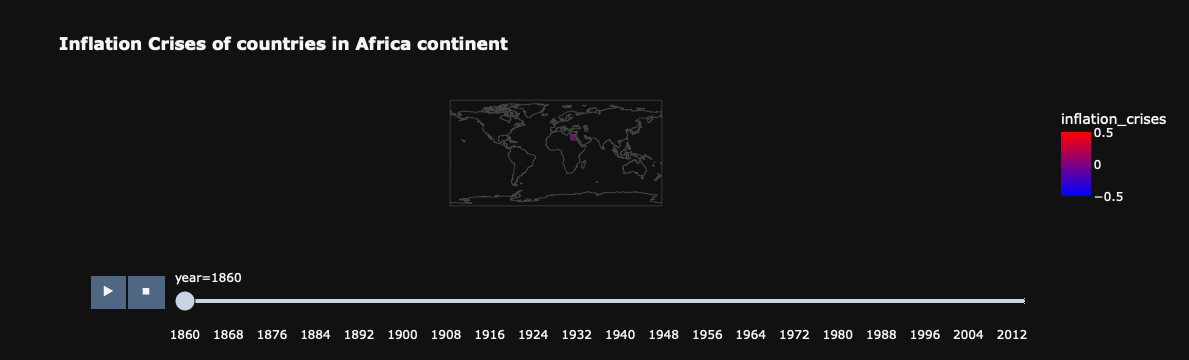

In [27]:
px.choropleth(df.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_crises':'inflation_crises','cc3':'code','country':'country'},animation_group='country',color='inflation_crises',title='<b>Inflation Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')

# Featuring Enginerring

### Encoding

In [30]:
df_bk=df.copy()

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [32]:
x=df.drop('banking_crisis',axis=1)
y=df['banking_crisis']

In [33]:
df['banking_crisis'].value_counts()

banking_crisis
1    965
0     94
Name: count, dtype: int64

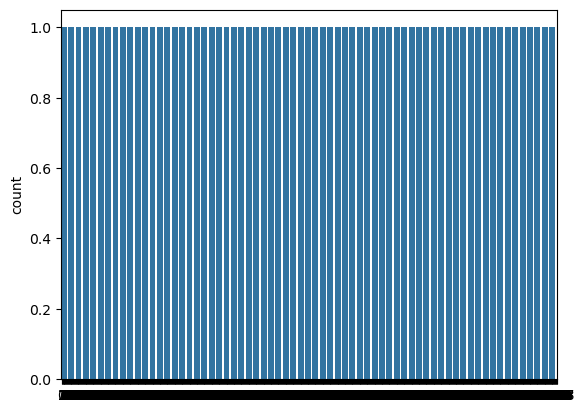

In [34]:
sns.countplot(df['banking_crisis'])
plt.show()

### Random Over Sampler

In [36]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.15)
x_over,y_over=oversample.fit_resample(x,y)
print(x_over)
print(y_over)

      case  cc3  country  year  systemic_crisis      exch_usd  \
0        1    3        0  1870                1  5.226400e-02   
1        1    3        0  1871                0  5.279800e-02   
2        1    3        0  1872                0  5.227400e-02   
3        1    3        0  1873                0  5.168000e-02   
4        1    3        0  1874                0  5.130800e-02   
...    ...  ...      ...   ...              ...           ...   
1104    45    8        8  2012                1  1.552700e+02   
1105    38    7        6  1996                0  1.797150e+01   
1106    19    4        3  1931                1  2.890000e-01   
1107    63    9       10  1995                1  9.508000e-01   
1108    70   12       12  1999                1  3.720000e-25   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                            0                                0   
1                            0                                0   
2                 

### Train/split data

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=42)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((776, 13), (333, 13), (776,), (333,))

### MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)

In [42]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [43]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[]}
result=pd.DataFrame(a)
result

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Confusion matrix:
 [[291   2]
 [  7  33]]
Outcome values:
 291 2 7 33
Accuracy: 0.97
Precision: 0.98
Recall: 0.99
F1 Score: 0.98
Specificity: 0.82
MCC: 0.87
ROC AUC Score: 0.91


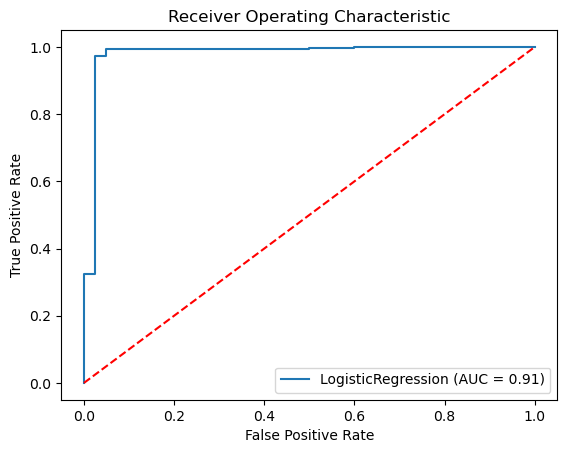

Confusion matrix:
 [[288   5]
 [  2  38]]
Outcome values:
 288 5 2 38
Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1 Score: 0.99
Specificity: 0.95
MCC: 0.90
ROC AUC Score: 0.97


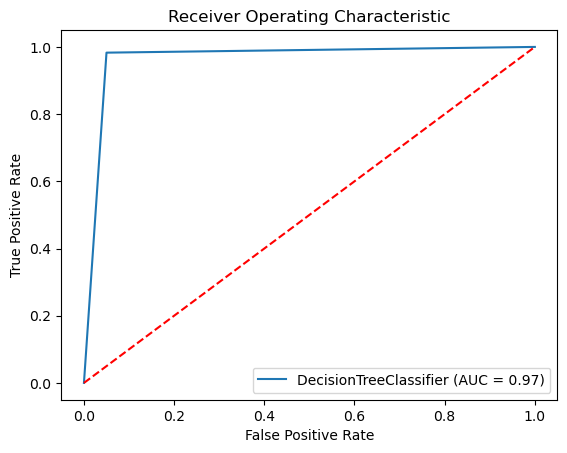

Confusion matrix:
 [[290   3]
 [  2  38]]
Outcome values:
 290 3 2 38
Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Specificity: 0.95
MCC: 0.93
ROC AUC Score: 0.97


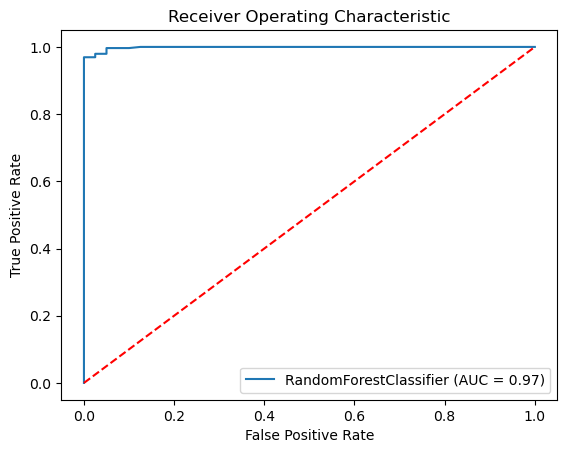

Confusion matrix:
 [[289   4]
 [  2  38]]
Outcome values:
 289 4 2 38
Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Specificity: 0.95
MCC: 0.92
ROC AUC Score: 0.97


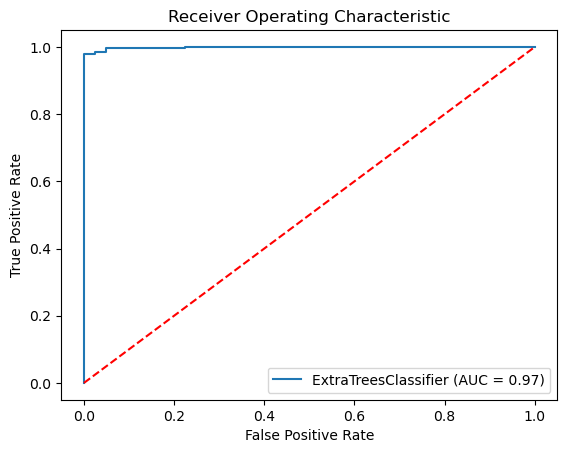

Confusion matrix:
 [[290   3]
 [  2  38]]
Outcome values:
 290 3 2 38
Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Specificity: 0.95
MCC: 0.93
ROC AUC Score: 0.97


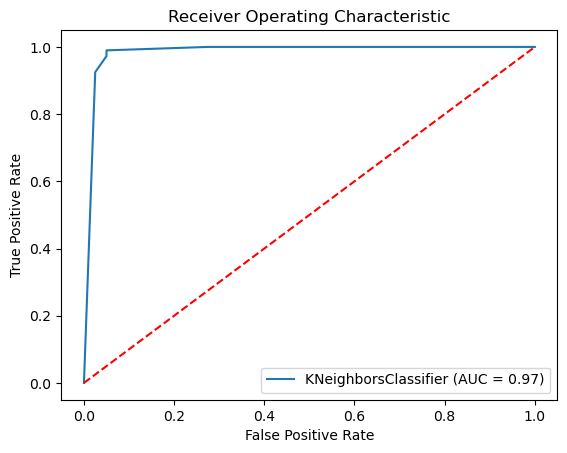

Confusion matrix:
 [[291   2]
 [  2  38]]
Outcome values:
 291 2 2 38
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Specificity: 0.95
MCC: 0.94
ROC AUC Score: 0.97


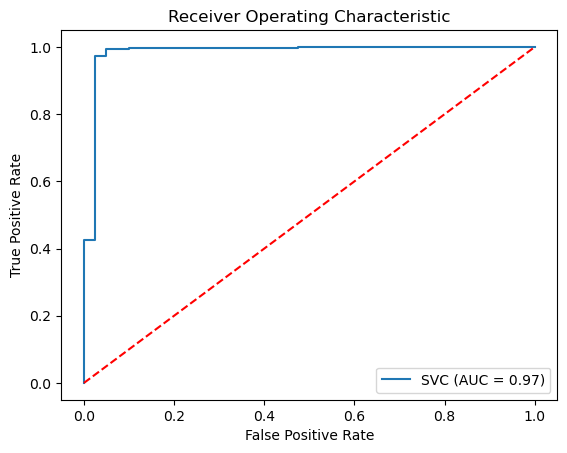

Confusion matrix:
 [[289   4]
 [  2  38]]
Outcome values:
 289 4 2 38
Accuracy: 0.98
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Specificity: 0.95
MCC: 0.92
ROC AUC Score: 0.97


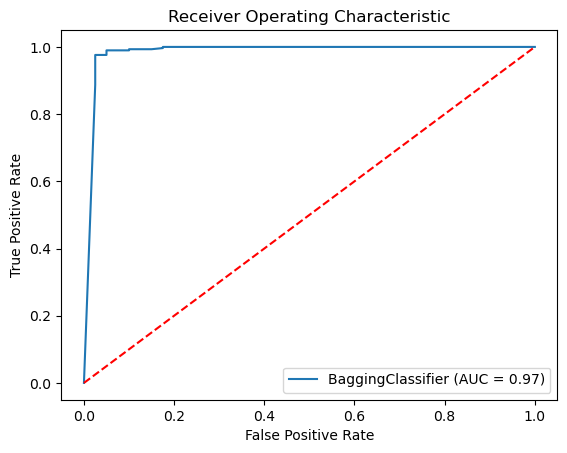

Error with GradientBoostingClassifier: The 'loss' parameter of GradientBoostingClassifier must be a str among {'exponential', 'log_loss'}. Got 'deviance' instead.
[LightGBM] [Info] Number of positive: 672, number of negative: 104
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 776, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.865979 -> initscore=1.865867
[LightGBM] [Info] Start training from score 1.865867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

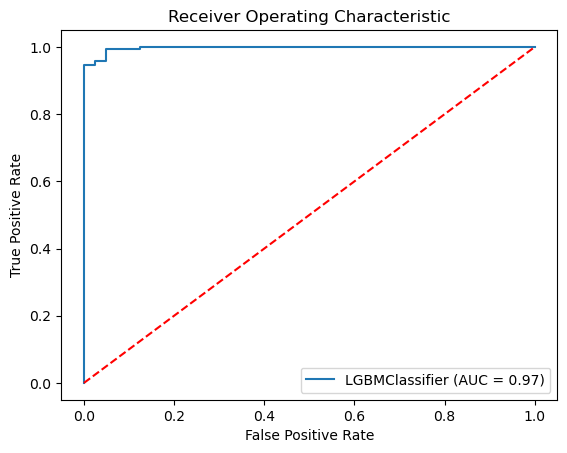

Confusion matrix:
 [[282  11]
 [  2  38]]
Outcome values:
 282 11 2 38
Accuracy: 0.96
Precision: 0.99
Recall: 0.96
F1 Score: 0.98
Specificity: 0.95
MCC: 0.84
ROC AUC Score: 0.96


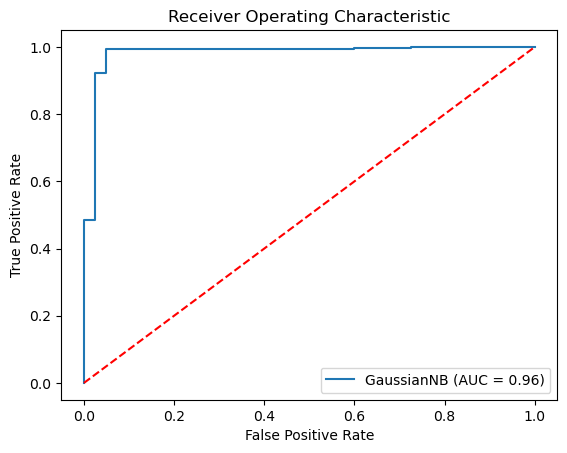

In [60]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import math

# Inicializando o DataFrame de resultados
result = pd.DataFrame(columns=['Model Name', 'True Positive', 'False Negative', 'False Positive', 'True Negative',
                               'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity', 'MCC', 
                               'ROC_AUC_Score', 'Balanced Accuracy'])

for models in MM:
    try:
        # Fit do modelo
        models.fit(x_train, y_train)

        # Predições
        y_pred = models.predict(x_test)
        if hasattr(models, "predict_proba"):
            y_pred_prob = models.predict_proba(x_test)
        else:
            y_pred_prob = None

        # Confusion Matrix
        matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
        print('Confusion matrix:\n', matrix)

        tp, fn, fp, tn = matrix.ravel()
        print('Outcome values:\n', tp, fn, fp, tn)

        # Métricas
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        accuracy = (tp + tn) / (tp + fp + tn + fn) if (tp + fp + tn + fn) != 0 else 0
        balanced_accuracy = (sensitivity + specificity) / 2
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        f1Score = (2 * tp) / (2 * tp + fp + fn) if (2 * tp + fp + fn) != 0 else 0
        mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
        MCC = ((tp * tn) - (fp * fn)) / math.sqrt(mx) if mx != 0 else 0

        roc_auc = roc_auc_score(y_test, y_pred) if hasattr(models, "predict_proba") else None

        print(f'Accuracy: {accuracy:.2f}')
        print(f'Precision: {precision:.2f}')
        print(f'Recall: {sensitivity:.2f}')
        print(f'F1 Score: {f1Score:.2f}')
        print(f'Specificity: {specificity:.2f}')
        print(f'MCC: {MCC:.2f}')
        print(f'ROC AUC Score: {roc_auc:.2f}' if roc_auc else 'ROC AUC Score: N/A')

        # Plot da curva ROC (se aplicável)
        if hasattr(models, "predict_proba"):
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
            plt.figure()
            plt.plot(fpr, tpr, label=f'{type(models).__name__} (AUC = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'r--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic')
            plt.legend(loc="lower right")
            plt.show()

        # Criando nova linha de resultados
        new_row = pd.DataFrame([{
            'Model Name': type(models).__name__,
            'True Positive': tp,
            'False Negative': fn,
            'False Positive': fp,
            'True Negative': tn,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': sensitivity,
            'F1 Score': f1Score,
            'Specificity': specificity,
            'MCC': MCC,
            'ROC_AUC_Score': roc_auc if roc_auc else 'N/A',
            'Balanced Accuracy': balanced_accuracy
        }])

        # Concatenando nova linha ao DataFrame de resultados
        result = pd.concat([result, new_row], ignore_index=True)

    except Exception as e:
        print(f"Error with {type(models).__name__}: {e}")


In [62]:
# Exibindo resultados
from IPython.display import display
display(result)

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression,291,2,7,33,0.972973,0.976510,0.993174,0.984772,0.825,0.867296,0.909087,0.909087
1,DecisionTreeClassifier,288,5,2,38,0.978979,0.993103,0.982935,0.987993,0.950,0.904445,0.966468,0.966468
2,RandomForestClassifier,290,3,2,38,0.984985,0.993151,0.989761,0.991453,0.950,0.929818,0.969881,0.969881
3,ExtraTreesClassifier,289,4,2,38,0.981982,0.993127,0.986348,0.989726,0.950,0.916917,0.968174,0.968174
4,KNeighborsClassifier,290,3,2,38,0.984985,0.993151,0.989761,0.991453,0.950,0.929818,0.969881,0.969881
5,SVC,291,2,2,38,0.987988,0.993174,0.993174,0.993174,0.950,0.943174,0.971587,0.971587
6,BaggingClassifier,289,4,2,38,0.981982,0.993127,0.986348,0.989726,0.950,0.916917,0.968174,0.968174
7,LGBMClassifier,290,3,2,38,0.984985,0.993151,0.989761,0.991453,0.950,0.929818,0.969881,0.969881
8,GaussianNB,282,11,2,38,0.960961,0.992958,0.962457,0.977470,0.950,0.837373,0.956229,0.956229


In [69]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','KNeighborsClassifier','SVC','BaggingClassifier','GradientBoostingClassifier','LGBMClassifier','GaussianNB']}
out=pd.DataFrame(models)
out['Accuracy']=result['Accuracy']
out['Precision']=result['Precision']
out['Recall']=result['Recall']
out['F1 Score']=result['F1 Score']
out['True Positive']=result['True Positive']
out['False Negative']=result['False Negative']
out['False Positive']=result['False Positive']
out['True Negative']=result['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

,models,Accuracy,Precision,Recall,F1 Score,True Positive,False Negative,False Positive,True Negative
0,SVC,0.988,0.993,0.993,0.993,291,2,2,38
1,RandomForestClassifier,0.985,0.993,0.990,0.991,290,3,2,38
2,KNeighborsClassifier,0.985,0.993,0.990,0.991,290,3,2,38
3,GradientBoostingClassifier,0.985,0.993,0.990,0.991,290,3,2,38
4,LGBMClassifier,0.985,0.993,0.990,0.991,290,3,2,38
5,ExtraTreesClassifier,0.982,0.993,0.986,0.990,289,4,2,38
6,BaggingClassifier,0.982,0.993,0.986,0.990,289,4,2,38
7,DecisionTreeClassifier,0.979,0.993,0.983,0.988,288,5,2,38
8,LogisticRegression,0.973,0.977,0.993,0.985,291,2,7,33
9,GaussianNB,0.961,0.993,0.962,0.977,282,11,2,38


### From the above results, the top model is Support Vector Classifier

In [75]:
y_pred=ModelSVM.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=df_bk.merge(out,left_index=True,right_index=True)
out['actual'].replace(1,'no_crisis',inplace=True)
out['actual'].replace(0,'crisis',inplace=True)
out['predicted'].replace(1,'no_crisis',inplace=True)
out['predicted'].replace(0,'crisis',inplace=True)
out[['country','year','banking_crisis','predicted']].sample(10)

,country,year,banking_crisis,predicted
525,Mauritius,1967,no_crisis,no_crisis
673,Nigeria,1979,no_crisis,no_crisis
674,Nigeria,1980,no_crisis,no_crisis
661,Nigeria,1967,no_crisis,no_crisis
885,Tunisia,2003,no_crisis,no_crisis
292,Egypt,1869,no_crisis,no_crisis
970,Zimbabwe,1922,no_crisis,no_crisis
394,Egypt,1971,no_crisis,no_crisis
584,Morocco,1951,no_crisis,no_crisis
696,Nigeria,2003,no_crisis,no_crisis
